# Лабораторная работа: Аппроксимация и линеаризация функций


## Вспомогательные функции:
Реализовать функцию, вычисляющую среднеквадратичное отклонение (СКО) набора числовых данных

In [1]:
import numpy as np

def calculate_rmse(y_true, y_pred):
    """
    Вычисляет среднеквадратичное отклонение (RMSE)
    """
    return np.sqrt(np.mean((y_true - y_pred)**2))


# 1: Линейная аппроксимация (МНК)

## Описание
Изучается процесс нагрева воды в электрическом чайнике. Измеряется температура воды 
T в градусах Цельсия в зависимости от времени нагрева 
t в минутах. Из-за постоянного поступления тепла температура воды растёт почти линейно на начальном этапе.

### Задача
Найти линейную зависимость температуры воды от времени нагрева в виде уравнения:
\[
T = a t + b,
\]
### Требуется
- Определить коэффициенты \(a\) и \(b\),
- Построить график зависимости температуры от времени, отображая экспериментальные точки и линию аппроксимации,
- Рассчитать среднеквадратичное отклонение (СКО) между экспериментальными и расчетными значениями температуры, чтобы проверить точность модели.


## Исходные данные

Коэффициенты: a = 2.4336, b = 19.9045
Уравнение: T = 2.4336 * t + 19.9045
RMSE: 0.0583


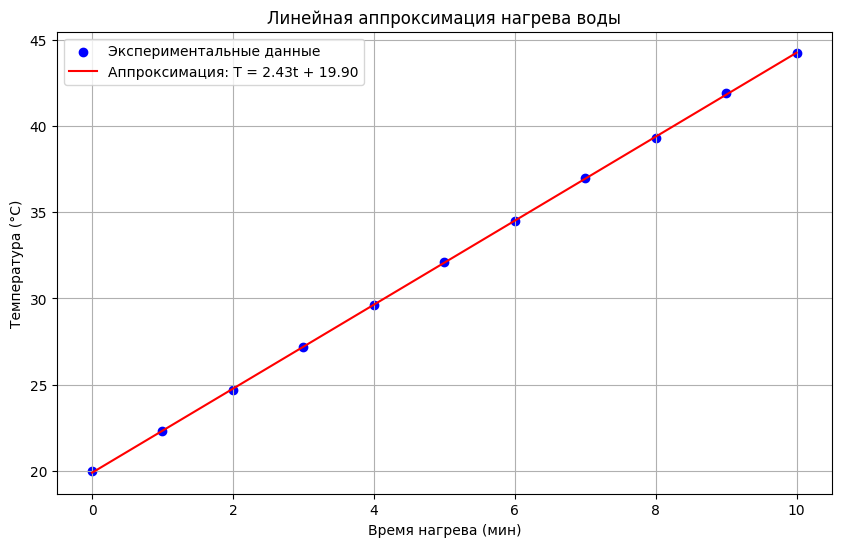

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Используем метод наименьших квадратов
# Данные: время нагрева (мин) и температура (°C)
t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
T = np.array([20.0, 22.3, 24.7, 27.2, 29.6, 32.1, 34.5, 37.0, 39.3, 41.9, 44.2])

coefficients = np.polyfit(t, T, 1)
a = coefficients[0]
b = coefficients[1]

print(f"Коэффициенты: a = {a:.4f}, b = {b:.4f}")
print(f"Уравнение: T = {a:.4f} * t + {b:.4f}")

T_pred = a * t + b

try:
    rmse = calculate_rmse(T, T_pred)
    print(f"RMSE: {rmse:.4f}")
except NameError:
    print("Ошибка: Функция calculate_rmse не определена.")



plt.figure(figsize=(10, 6))
plt.scatter(t, T, color='blue', label='Экспериментальные данные')
plt.plot(t, T_pred, color='red', label=f'Аппроксимация: T = {a:.2f}t + {b:.2f}')
plt.xlabel('Время нагрева (мин)')
plt.ylabel('Температура (°C)')
plt.title('Линейная аппроксимация нагрева воды')
plt.legend()
plt.grid(True)
plt.show()


# 2: Линеаризация экспоненциальной функции

## Описание
Изучается процесс разрядки аккумулятора мобильного устройства. Известно, что напряжение аккумулятора \( V(t) \) со временем уменьшается по экспоненциальному закону:
$V(t) = a \cdot e^{bt}$

Требуется:
- Линеаризовать экспоненциальную функцию,
- Найти параметры \( a \) и \( b \),
- Построить график зависимости напряжения от времени (экспериментальные данные и аппроксимация),
- Спрогнозировать дальнейшее падение напряжения,
- Рассчитать среднеквадратичное отклонение (СКО).

## Исходные данные

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Данные разрядки аккумулятора
hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
voltage = np.array([4.15, 4.09, 4.02, 3.96, 3.89, 3.83, 3.76, 3.70, 3.64, 3.58, 3.52, 3.47, 3.43, 3.40, 3.38, 3.37])




## Процесс линеаризации

**Шаг 1:** Исходная функция: $T(t) = a \cdot e^{bt}$

**Шаг 2:** Логарифмируем обе части:
$\ln(T) = \ln(a) + bt$

**Шаг 3:** Делаем замены: $g = \ln(T)$, $t = t$, $c = \ln(a)$, $d = b$

**Шаг 4:** Получаем линейную функцию: $g = c + d \cdot t$

Параметры: a = 4.1883, b = -0.0149
Уравнение: V(t) = 4.1883 * e^(-0.0149 * t)
RMSE: 0.0274


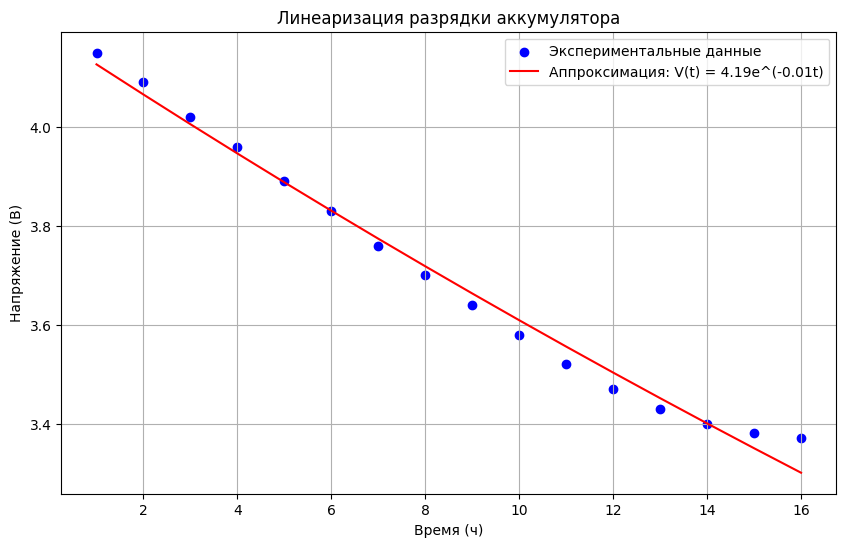

Прогноз напряжения на 17 час: 3.2519 В


In [ ]:
# Линеаризация: ln(V) = ln(a) + b*t
# y = A + B*x
# где y = ln(V), x = t, A = ln(a), B = b

log_voltage = np.log(voltage)

coeffs_lin = np.polyfit(hours, log_voltage, 1)
b_param = coeffs_lin[0]
ln_a = coeffs_lin[1]
a_param = np.exp(ln_a)

print(f"Параметры: a = {a_param:.4f}, b = {b_param:.4f}")
print(f"Уравнение: V(t) = {a_param:.4f} * e^({b_param:.4f} * t)")

voltage_pred = a_param * np.exp(b_param * hours)

rmse_exp = calculate_rmse(voltage, voltage_pred)
print(f"RMSE: {rmse_exp:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(hours, voltage, color='blue', label='Экспериментальные данные')
plt.plot(hours, voltage_pred, color='red', label=f'Аппроксимация: V(t) = {a_param:.2f}e^({b_param:.2f}t)')
plt.xlabel('Время (ч)')
plt.ylabel('Напряжение (В)')
plt.title('Линеаризация разрядки аккумулятора')
plt.legend()
plt.grid(True)
plt.show()

t_forecast = 17
v_forecast = a_param * np.exp(b_param * t_forecast)
print(f"Прогноз напряжения на {t_forecast} час: {v_forecast:.4f} В")

# Вариант задание выбирается Номер в списке % 3

# Задание 3 Вариант 0

## Описание задачи
При исследовании зависимости силы трения от нормальной нагрузки получены следующие экспериментальные данные:

| Нормальная сила (Н) | 1 | 2 | 3 | 5 | 8 | 10 | 15 | 20 |
|---|---|---|---|---|---|---|---|---|
| Сила трения (Н) | 0.30 | 0.88 | 1.65 | 4.08 | 10.21 | 15.95 | 35.70 | 63.50 |

## Задание
1. Предположите **степенную функцию** вида $f = c \cdot N^\alpha$.
2. Выполните **логарифмическую линеаризацию**: прологарифмируйте обе части уравнения и получите $\ln f = \ln c + \alpha \ln N$.
3. Постройте **линейную регрессию** для преобразованных координат $(\ln N, \ln f)$.
4. Найдите параметры $c$ и $\alpha$, вычислите $R^2$.
5. Постройте **графики** в логарифмических координатах (линия регрессии) и в исходных координатах (степенная функция через исходные данные).
6. Используя полученную модель, предскажите силу трения при нормальной силе 25 Н.

---

# Задание 3 Вариант 1

## Описание задачи
Биологи проводили сравнительное исследование интенсивности основного обмена (BMR, Basal Metabolic Rate) у различных млекопитающих в зависимости от их массы тела. Согласно эмпирическому закону Клейбера, метаболизм животного подчиняется степенной зависимости. Полученные экспериментальные данные:

| Вид животного | Масса (кг) | Основной обмен (ккал/день) |
|---|---|---|
| Мышь | 0.03 | 1.2 |
| Крыса | 0.2 | 5.8 |
| Кролик | 2.0 | 45.0 |
| Кошка | 4.5 | 110.0 |
| Собака | 15 | 380.0 |
| Обезьяна | 35 | 920.0 |
| Человек | 70 | 1850.0 |
| Лошадь | 450 | 10500.0 |
| Слон | 5000 | 95000.0 |

## Задание

1. Предположите **степенную зависимость** вида $BMR = c \cdot M^\alpha$, где $M$ — масса животного, $BMR$ — основной обмен, $c$ и $\alpha$ — параметры модели.

2. Выполните **логарифмическую линеаризацию**: преобразуйте исходные координаты, взяв логарифмы обеих частей:
   $\ln(BMR) = \ln(c) + \alpha \ln(M)$

3. Постройте **линейную регрессию** для преобразованных координат $(\ln M, \ln BMR)$:
   - Найдите параметры линии регрессии
   - Вычислите $R^2$ для линеаризованной модели
   - Оцените погрешность определения параметров

4. Восстановите исходные параметры степенной функции:
   - Найдите $c = e^b$, где $b$ — свободный член линейной регрессии
   - Получите показатель степени $\alpha$

5. Создайте **комплексную визуализацию**:
   - График в логарифмических координатах $(\ln M, \ln BMR)$ с линией регрессии
   - График в исходных координатах с степенной кривой
   - График остатков в обоих представлениях

6. Вычислите **коэффициент детерминации** $R^2$ для исходной степенной модели и сравните с линеаризованной.

7. Проанализируйте результаты:
   - Согласуется ли найденное значение $\alpha$ с известным результатом Клейбера (теоретически $\alpha \approx 0.75$)?
   - Что означает показатель степени $\alpha$ с физиологической точки зрения?
   - Как соотносятся поверхность и объём тела животного с показателем 0.75?

8. Используя полученную модель, предскажите основной обмен для:
   - Льва массой 190 кг
   - Енота массой 8 кг
   - Синего кита массой 150 000 кг

---

# Задание 3 Вариант 2

## Описание задачи
При исследовании освещённости поверхности в зависимости от расстояния до точечного источника света проведены измерения интенсивности света. Теоретически свет распространяется по закону обратных квадратов, но из-за рассеяния и поглощения в атмосфере показатель степени может отличаться от -2. Экспериментальные данные:

| Расстояние (м) | 0.5 | 1.0 | 1.5 | 2.0 | 2.5 | 3.0 | 4.0 | 5.0 | 6.0 | 7.0 |
|---|---|---|---|---|---|---|---|---|---|---|
| Интенсивность (люкс) | 2000 | 520 | 235 | 135 | 87 | 62 | 35 | 23 | 16 | 12 |

## Задание

1. Предположите **степенную функцию** вида $I = c \cdot r^\alpha$, где $r$ — расстояние до источника, $I$ — интенсивность света, $c$ и $\alpha$ — параметры.

2. Выполните **двойную логарифмическую линеаризацию**:
   $\ln(I) = \ln(c) + \alpha \ln(r)$

3. Постройте **линейную регрессию** для координат $(\ln r, \ln I)$:
   - Найдите коэффициенты регрессии
   - Вычислите коэффициент корреляции и $R^2$
   - Определите доверительный интервал для параметра $\alpha$

4. Восстановите параметры степенной функции $c$ и $\alpha$.

5. Выполните **анализ отклонений от теории**:
   - Сравните полученное значение $\alpha$ с теоретическим $\alpha = -2$
   - Объясните причины отклонения (рассеяние, поглощение, асферичность источника)

6. Создайте **графики**:
   - Двойной логарифмический график с линией регрессии
   - Исходные данные в линейном масштабе со степенной кривой
   - График остатков с выявлением систематических погрешностей

7. Вычислите **относительную ошибку** для каждой точки в процентах:
   $\delta_i = \frac{|I_{измеренная} - I_{предсказанная}|}{I_{измеренная}} \times 100\%$

8. Определите, в каком диапазоне расстояний модель работает наиболее точно, и объясните причины изменения точности.

9. Используя полученную модель, предскажите интенсивность света на расстояниях:
   - 0.3 м (экстраполяция в близкую область)
   - 10 м (экстраполяция в дальнюю область)
   - Оцените надежность предсказаний


--- Результаты моделирования ---
Параметры модели: c = 0.2557, alpha = 1.8021
Полученное уравнение: f = 0.2557 * N^1.8021
Коэффициент детерминации (R^2) для линеаризованной модели: 0.9968


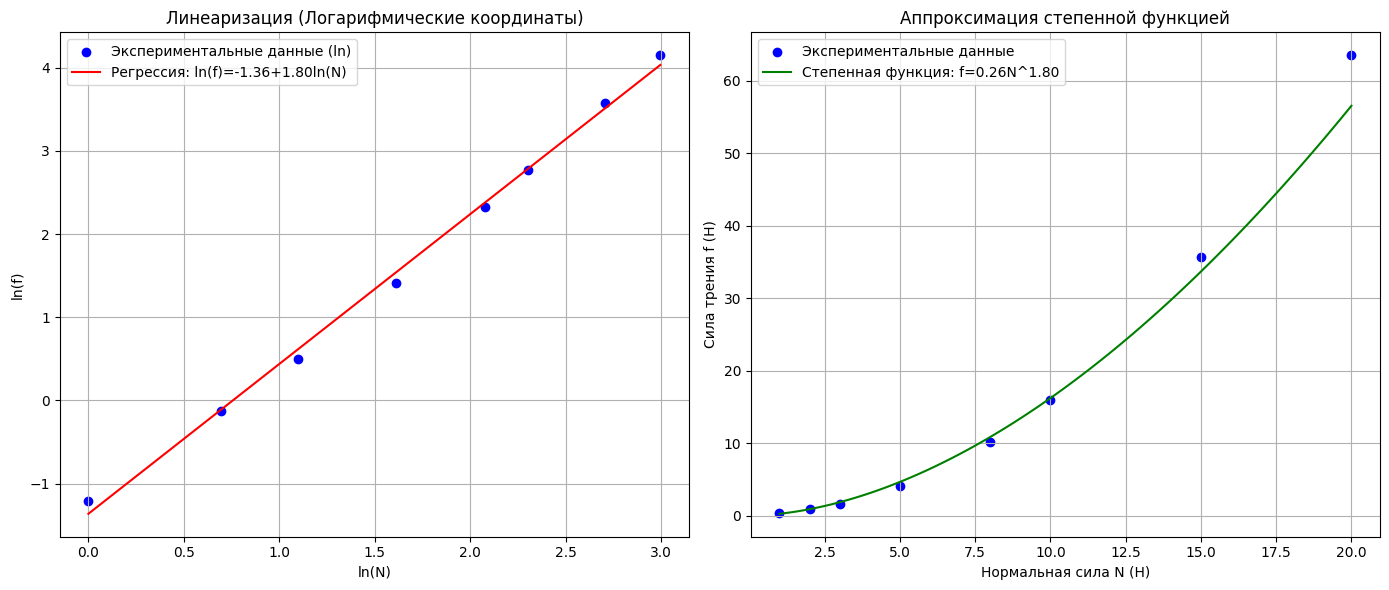


--- Прогноз ---
Предсказанная сила трения при нормальной силе 25 Н: 84.5087 Н


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Задание 3 Вариант 0

N = np.array([1, 2, 3, 5, 8, 10, 15, 20])
f = np.array([0.30, 0.88, 1.65, 4.08, 10.21, 15.95, 35.70, 63.50])


ln_N = np.log(N)
ln_f = np.log(f)

coeffs_pow = np.polyfit(ln_N, ln_f, 1)
alpha = coeffs_pow[0]
ln_c = coeffs_pow[1]
c = np.exp(ln_c)

print(f"--- Результаты моделирования ---")
print(f"Параметры модели: c = {c:.4f}, alpha = {alpha:.4f}")
print(f"Полученное уравнение: f = {c:.4f} * N^{alpha:.4f}")

ln_f_pred = alpha * ln_N + ln_c
ss_res = np.sum((ln_f - ln_f_pred)**2)
ss_tot = np.sum((ln_f - np.mean(ln_f))**2)
r2 = 1 - (ss_res / ss_tot)
print(f"Коэффициент детерминации (R^2) для линеаризованной модели: {r2:.4f}")

plt.figure(figsize=(14, 6))

# График: Логарифмические координаты
plt.subplot(1, 2, 1)
plt.scatter(ln_N, ln_f, color='blue', label='Экспериментальные данные (ln)')
plt.plot(ln_N, ln_f_pred, color='red', label=f'Регрессия: ln(f)={ln_c:.2f}+{alpha:.2f}ln(N)')
plt.xlabel('ln(N)')
plt.ylabel('ln(f)')
plt.title('Линеаризация (Логарифмические координаты)')
plt.legend()
plt.grid(True)

# График: Исходные координаты
f_pred = c * N**alpha # Расчетные значения в исходных координатах

plt.subplot(1, 2, 2)
plt.scatter(N, f, color='blue', label='Экспериментальные данные')
x_smooth = np.linspace(min(N), max(N), 100)
y_smooth = c * x_smooth**alpha
plt.plot(x_smooth, y_smooth, color='green', label=f'Степенная функция: f={c:.2f}N^{alpha:.2f}')
plt.xlabel('Нормальная сила N (Н)')
plt.ylabel('Сила трения f (Н)')
plt.title('Аппроксимация степенной функцией')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

N_target = 25
f_target = c * N_target**alpha
print(f"\n--- Прогноз ---")
print(f"Предсказанная сила трения при нормальной силе {N_target} Н: {f_target:.4f} Н")